In [3]:
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from scipy.cluster import hierarchy as sch 
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# IMPORTING DATASET

In [4]:
airline_data=pd.read_csv('EastWestAirlines.csv')

In [5]:
airline_data.describe

<bound method NDFrame.describe of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1           

In [6]:
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# DATA UNDERSTANDING

In [7]:
airline_data.shape

(3999, 12)

In [8]:
airline_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
airline_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
airline_data.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


# Data Preparation

In [11]:
airline_data.drop('ID#',axis=1,inplace=True)

In [12]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
airline_data.rename(columns={'Award?':'award' },inplace=True)

In [14]:
airline_copy=airline_data.copy()

In [15]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [16]:
airline_norm=norm_func(airline_data)
airline_norm.head(50)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,0.016508,0.000000,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.000000,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.000000,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.000000,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.000000,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.000000,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.000000,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.000000,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.000000,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


# Hierarchical Clustering

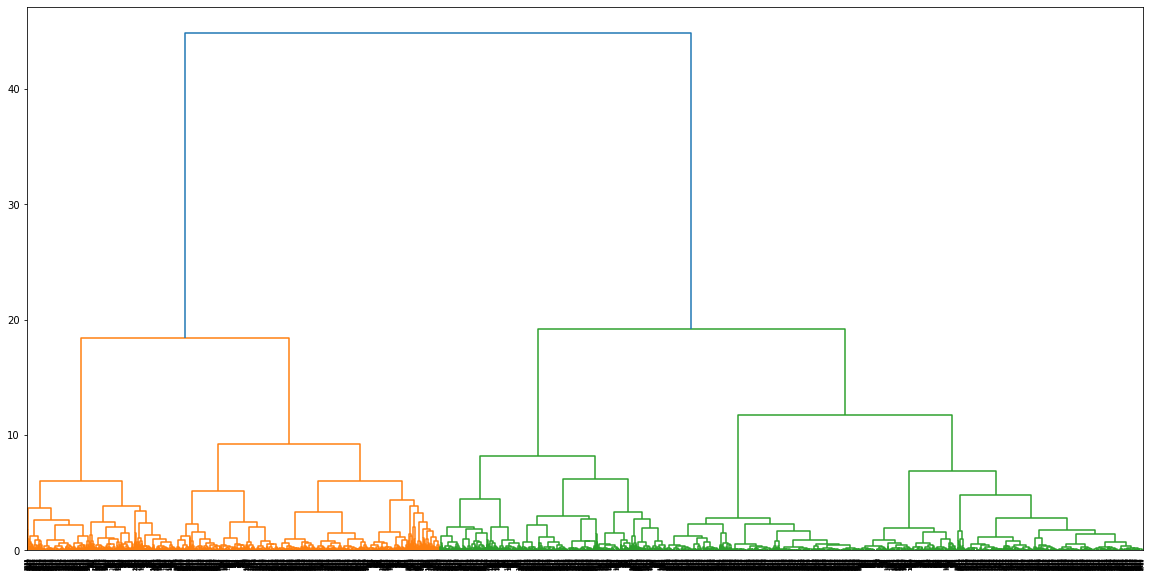

In [18]:
plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(airline_norm,method='ward'))
plt.show()

In [19]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

In [20]:
hirar_cluster=hc.fit_predict(airline_norm)

In [21]:
hirar_cluster

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [22]:
airline_data['hc_cluster']=hirar_cluster

In [23]:
airline_data.head(50)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,hc_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0


In [24]:
airline_data.groupby('hc_cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
hc_cluster,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1
1,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0


# KMEANS Clustering

#### BEFORE KMEANS WE CAN DO CLUSTER VALIDATION TECHNIQUE TO FIND OPTIMAL NUMBER OF CLUSTER FOR OUR KMEANS MODEL

# 1 WCSS METHOD
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [25]:
from yellowbrick.cluster import KElbowVisualizer

In [26]:
km=KMeans()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10))

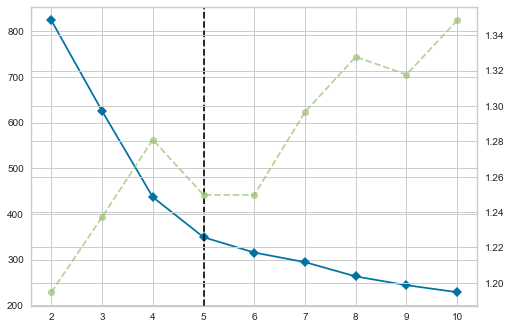

In [27]:
visualizer1=KElbowVisualizer(km)
visualizer1.fit(airline_norm)

##### manual process

In [28]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=12)
    km.fit_predict(airline_norm)
    wcss.append(km.inertia_)

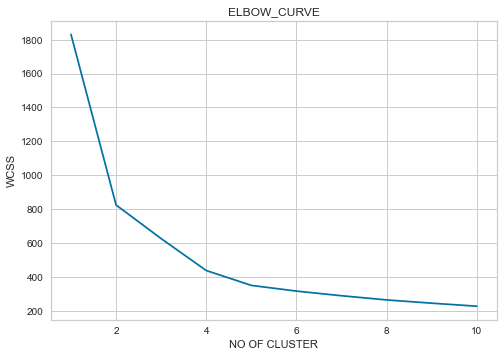

In [29]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW_CURVE')
plt.xlabel('NO OF CLUSTER')
plt.ylabel('WCSS')
plt.show()


# 2. SILLHOUTTE SCORE

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

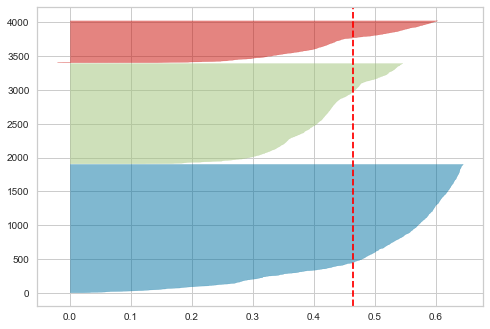

In [31]:
km2=KMeans(n_clusters=3)
visualizer2=SilhouetteVisualizer(km2,colors='yellowbrick')
visualizer2.fit(airline_norm)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

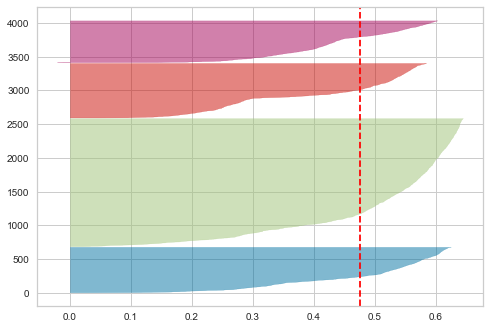

In [32]:
km3=KMeans(n_clusters=4)
visualizer2=SilhouetteVisualizer(km3,colors='yellowbrick')
visualizer2.fit(airline_norm)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5))

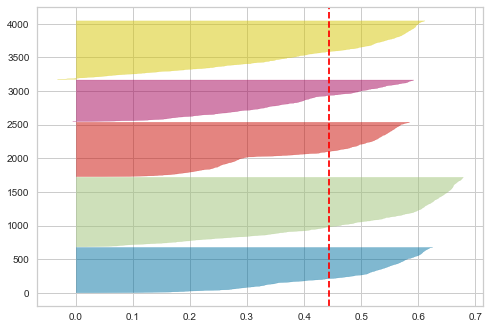

In [33]:
km4=KMeans(n_clusters=5)
visualizer2=SilhouetteVisualizer(km4,colors='yellowbrick')
visualizer2.fit(airline_norm)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=6))

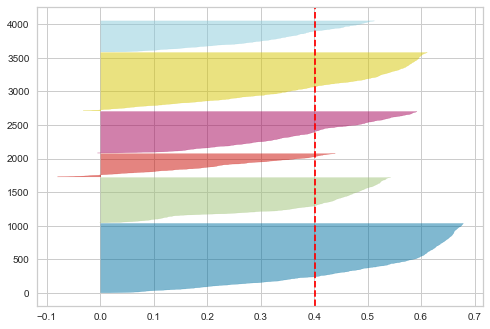

In [34]:
km6=KMeans(n_clusters=6)
visualizer2=SilhouetteVisualizer(km6,colors='yellowbrick')
visualizer2.fit(airline_norm)

# 3. CALINSKI_HARABAZ_SCORE

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=10, random_state=12),
                 metric='calinski_harabasz')

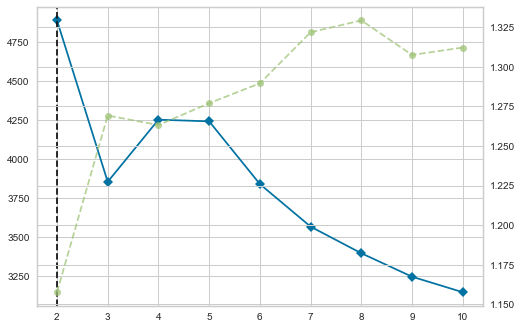

In [35]:
visualizer5=KElbowVisualizer(km,metric='calinski_harabasz')
visualizer5.fit(airline_norm)

##### manual procees below

In [36]:
from sklearn.metrics import calinski_harabasz_score as chs

In [37]:
iner1=[]
for i in range(2,11):
    k3=KMeans(n_clusters=i)
    ypred1=k3.fit_predict(airline_norm)
    iner1.append(chs(airline_norm,ypred1))

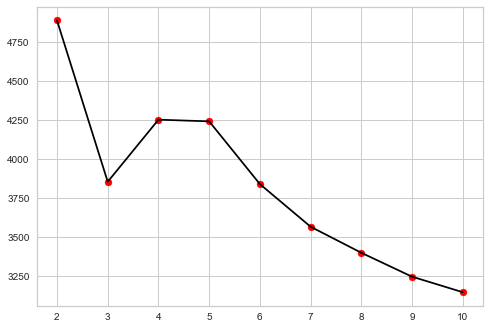

In [38]:
plt.plot(range(2,11),iner1,color='black')
plt.scatter(range(2,11),iner1,color='red')
plt.show()


## WE CAN SAY THAT AFTER FINDINGS MAYBE OPTIMAL NUMBER OF CLUSTER IS 5

In [39]:
kmeans=KMeans(n_clusters=5,random_state=12)

In [40]:
kmeans_cluster=kmeans.fit_predict(airline_norm)
kmeans_cluster

array([1, 1, 1, ..., 3, 4, 4])

In [41]:
airline_data['kmeans_cluster']=kmeans_cluster

In [42]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,hc_cluster,kmeans_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,4


In [43]:
airline_data.groupby('kmeans_cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,hc_cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster,,,,,,,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,0.000000
1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0,1.129032
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0,2.000000
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,0.000000
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0,1.075581


# 3 DBSCAN

# ITS GOOD IF WE REDUCED THE COLOUMN SO WE CAN GET BETTER RESULT IN DBSCAN

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne=TSNE(n_components=2,perplexity=20.0)

In [22]:
x_tsne=tsne.fit_transform(airline_norm)

In [23]:
x_tsne=pd.DataFrame(x_tsne,columns={'ts1','ts2'})

In [24]:
x_tsne

,ts2,ts1
0,-51.141079,37.047157
1,-50.929073,36.398338
2,-51.022228,33.738178
3,-50.652195,37.156693
4,38.712978,12.646662
...,...,...
3994,18.070707,-69.918556
3995,18.468191,-70.460579
3996,78.102165,-10.319402
3997,-31.560595,-47.913078


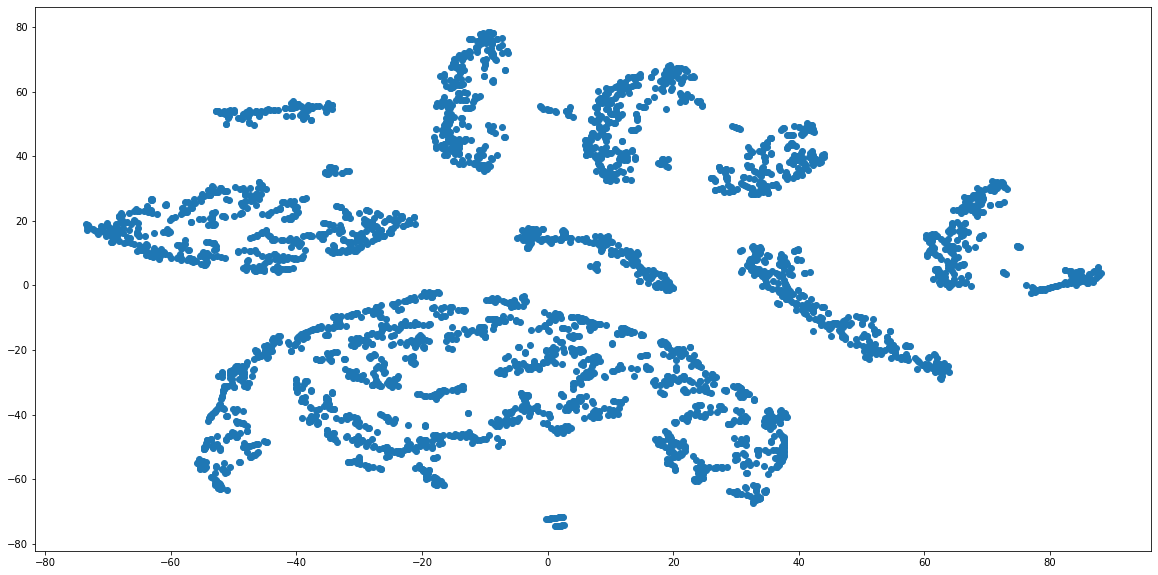

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(x=x_tsne['ts1'],y=x_tsne['ts2'])
plt.show()

In [26]:
from sklearn.metrics import silhouette_score


In [18]:
import numpy as np

In [44]:
eps_list=np.arange(start=5, stop=30, step=0.5)
min_sample_list=np.arange(start=2, stop=30, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(x_tsne)))>1):
            sil_score=silhouette_score(x_tsne, db.fit_predict(x_tsne))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.32971,eps:6.0 min_sample :26


In [46]:
db=DBSCAN(eps=6,min_samples=26,metric='euclidean',)

In [47]:
db_cluster=db.fit_predict(x_tsne)
db_cluster

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [48]:
airline_data['db_cluster']=db_cluster

In [49]:
airline_data.head(50)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,20856,0,1,1,1,5250,4,250,1,6938,1,3
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,4


In [50]:
airline_data.tail(50)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,db_cluster
3949,170632,0,1,1,1,4650,3,0,0,1480,0,0
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,0
3951,8273,0,1,1,1,0,0,0,0,1474,0,0
3952,5425,0,1,1,1,2000,9,0,0,1412,0,0
3953,59927,739,1,1,1,3100,3,0,0,1464,1,3
3954,33972,0,3,1,1,21029,29,0,0,1467,1,4
3955,71794,0,1,1,1,6000,3,0,0,1453,0,0
3956,47301,1005,1,1,1,4561,4,0,0,1464,0,0
3957,60854,0,1,1,1,5240,5,0,0,1457,0,0
3958,11680,0,1,1,1,1460,3,0,0,1459,0,0


In [51]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(x_tsne,db_cluster)

0.3297102

In [54]:
airline_data.groupby('db_cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
db_cluster,,,,,,,,,,,
-1,86911.115385,19.230769,1.615385,2.096154,1.615385,30089.711538,19.961538,556.788462,2.038462,4196.519231,0.423077
0,37956.634434,88.036557,1.000000,1.000000,1.004717,2505.498231,5.611439,240.267689,0.697524,3563.627358,0.000000
1,93852.760383,321.827476,4.000000,1.000000,1.003195,41355.316294,20.830671,811.396166,2.552716,4734.808307,1.000000
2,93331.892966,47.229358,3.000000,1.000000,1.000000,18895.730887,15.944954,177.810398,0.510703,4180.042813,0.000000
3,87670.182310,330.805054,1.001805,1.000000,1.003610,7748.528881,9.198556,1154.227437,3.492780,4332.548736,1.000000
4,70652.501792,79.580645,3.000000,1.000000,1.000000,21030.028674,17.261649,467.032258,1.293907,4486.734767,1.000000
5,67187.603352,144.525140,2.000000,1.000000,1.000000,10175.184358,14.022346,112.100559,0.318436,4226.793296,0.000000
6,178676.341232,176.876777,4.995261,1.000000,1.023697,83013.696682,22.843602,888.502370,2.635071,5538.028436,1.000000
